<a href="https://colab.research.google.com/github/ericr6/platform_analysis/blob/main/TRD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task analysis of iExec MArketplace
This notebook create dataframe using the graph,then from the dataframe you can easily create dashboard or explore data.

Section 0 : import and functions needed

Section 1 : retrieve latest data, latest N days with parameter N

Section 3 : Visualize recent TRD

Section 4 : Save historical data in google drive [DO NOT USE]

Section 5 : Load full historical data from google drive

Section 6 : Visualize full historical TRD

## Section 0 : import and functions needed


In [3]:
import requests
import json
import csv
from datetime import datetime, timedelta
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# @title Common Functions
# Function to convert Hexa String to Text
def hex_to_string(value):
    if not value:
        return value

    bytes_from_hex = bytes.fromhex(value[2:])
    return bytes_from_hex.decode('utf-8')

def filter_by_time_interval(data_list, date_begin, date_end):
    # Convert date_begin and date_end strings to datetime objects
    #date_begin = datetime.strptime(date_begin, '%Y-%m-%d %H:%M:%S')
    #date_end = datetime.strptime(date_end, '%Y-%m-%d %H:%M:%S')

    # Filter data_list based on timestamp falling within the specified time interval
    filtered_data = [row for row in data_list if date_begin <= datetime.utcfromtimestamp(int(row[0])) <= date_end]
    return filtered_data



def get_api_data_iexec_interval(url_query, query, global_skip, date_begin=None, date_end=None):
    total_data = []
    are_data = True
    detected = False
    skip = 0
    while are_data or not detected:

        # Construct the query with skip parameter and optional date filters
        query_iter = query.replace("skip_param", str(global_skip + skip))

        options = {
            'headers': {'Content-Type': 'application/json'},
            'data': '{"query": "' + query_iter + '"}',
        }

        response = requests.post(url_query, **options)

        # Check if the response contains valid JSON data
        response.raise_for_status()
        data = response.json()

        array_data = data.get('data', {}).get('deals', [])

        grouped = [
            [
                e['timestamp'],
                e['workerpoolPrice'],
                e['datasetPrice'],
                e['appPrice'],
                e['app']['name'],
                hex_to_string(e['app']['multiaddr']),
                e['workerpool']['id'],
            ]
            for e in array_data
        ]
        grouped = filter_by_time_interval(grouped, date_begin, date_end)

        total_data.extend(grouped)
        skip += 500
        _are_data = len(grouped) > 0
        if _are_data > 0 and are_data:
 #           print ("detected is true")
            detected = True
        are_data = len(grouped) > 0
        print("i= " + str(global_skip + skip) + " are_data: " + str(are_data) + "_are_data: " + str(_are_data) + " grouped size " +  str(len(grouped)) + " array_data size: " + str(len(array_data))  )
    return total_data



# Actualize data
url_query_bellecour = 'https://thegraph.bellecour.iex.ec/subgraphs/name/bellecour/poco-v5'
query = '{\
                deals(first:500, skip: skip_param, orderBy: timestamp, orderDirection: desc){\
                    timestamp\
                    workerpoolPrice\
                    datasetPrice\
                    appPrice\
                    app{\
                      name\
                      multiaddr,\
                    }\
                    workerpool{\
                      id\
                    }\
                  }\
                }'





## Section 1 : retrieve latest data, default (30 days)


In [7]:
# @title Get latest data ; Select N Days
_nbday=30
date_end = datetime.now()
date_begin = date_end - timedelta(days=_nbday)

print ("Period to retrieve:", date_begin, date_end)

#Define the desired data types
dtypes = {
    'DATE': 'object',
    'workerpoolPrice': 'float64',
    'datasetPrice': 'float64',
    'appPrice': 'float64',
    'appName': 'object',
    'appAddress': 'object',
    'workerpool': 'object'
}

api_data = get_api_data_iexec_interval(url_query_bellecour, query, 0, date_begin, date_end)
df_latest = pd.DataFrame(api_data, columns=["DATE", "workerpoolPrice", "datasetPrice","appPrice", "appName","appAddress", "workerpool"]).astype(dtypes)
df_latest["DATE"] = [datetime.utcfromtimestamp(int(x)) for x in df_latest["DATE"]]

print("Period observed", df_latest["DATE"].min(), df_latest["DATE"].max())
print("dataset length: " + str(df_latest.shape[0]))

Period to retrieve: 2025-08-03 11:30:47.593321 2025-09-02 11:30:47.593321


/tmp/ipython-input-4149953913.py:25: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  filtered_data = [row for row in data_list if date_begin <= datetime.utcfromtimestamp(int(row[0])) <= date_end]


i= 500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 1000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 1500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 2000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 2500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 3000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 3500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 4000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 4500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 5000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 5500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 6000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 6500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 7000 are_d

/tmp/ipython-input-1344195605.py:21: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df_latest["DATE"] = [datetime.utcfromtimestamp(int(x)) for x in df_latest["DATE"]]


Check dataset structure and data header, you can share to chatgpt this data structure, and ask him to plot anything you want, he will propose the code, then create a computing box and insert the code directly here to obtain what you ask

In [10]:
# @title check data set structure

df_latest.dtypes


,0
DATE,datetime64[ns]
workerpoolPrice,float64
datasetPrice,float64
appPrice,float64
appName,object
appAddress,object
workerpool,object


In [11]:
# @title check dataset header

df_latest

,DATE,workerpoolPrice,datasetPrice,appPrice,appName,appAddress,workerpool
0,2025-09-02 11:25:05,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.9.1-v15-debug,docker.io/iexechub/python-hello-world:8.0.0-sc...,0xf900995aa41ab29bc16ba0785d7c67ad9d301296
1,2025-09-02 11:23:45,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.9.1-v15-pro...,docker.io/iexechub/python-hello-world:8.0.0-sc...,0x0975bfce90f4748dab6d6729c96b33a2cd5491f5
2,2025-09-02 11:23:05,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.9.1-v15-debug,docker.io/iexechub/python-hello-world:8.0.0-sc...,0xdb214a4a444d176e22030be1ed89da1b029320f2
3,2025-09-02 11:21:35,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.9.1-v15-pro...,docker.io/iexechub/python-hello-world:8.0.0-sc...,0x0e7bc972c99187c191a17f3cae4a2711a4188c3f
4,2025-09-02 11:17:20,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.7.6-v15-debug,docker.io/iexechub/python-hello-world:8.0.0-sc...,0xdb214a4a444d176e22030be1ed89da1b029320f2
...,...,...,...,...,...,...,...
28633,2025-08-04 06:46:25,0.0,0.0,0.0,pierre-hello-world,aimendjari/pierre-app:1.0.0,0x4568effcec8ba0787e52deef10ed03267e7c95b1
28634,2025-08-04 06:40:15,0.0,0.0,0.0,pierre-hello-world,aimendjari/pierre-app:1.0.0,0x4568effcec8ba0787e52deef10ed03267e7c95b1
28635,2025-08-04 04:33:30,0.0,0.0,0.0,web3mail,iexechub/web3mail-dapp:0.9.0-sconify-5.7.5-v12...,0x0975bfce90f4748dab6d6729c96b33a2cd5491f5
28636,2025-08-04 04:33:20,0.0,0.0,0.0,web3mail,iexechub/web3mail-dapp:0.9.0-sconify-5.7.5-v12...,0x0975bfce90f4748dab6d6729c96b33a2cd5491f5


## Section 2 : Visualize recent activity

<Figure size 3500x1200 with 0 Axes>

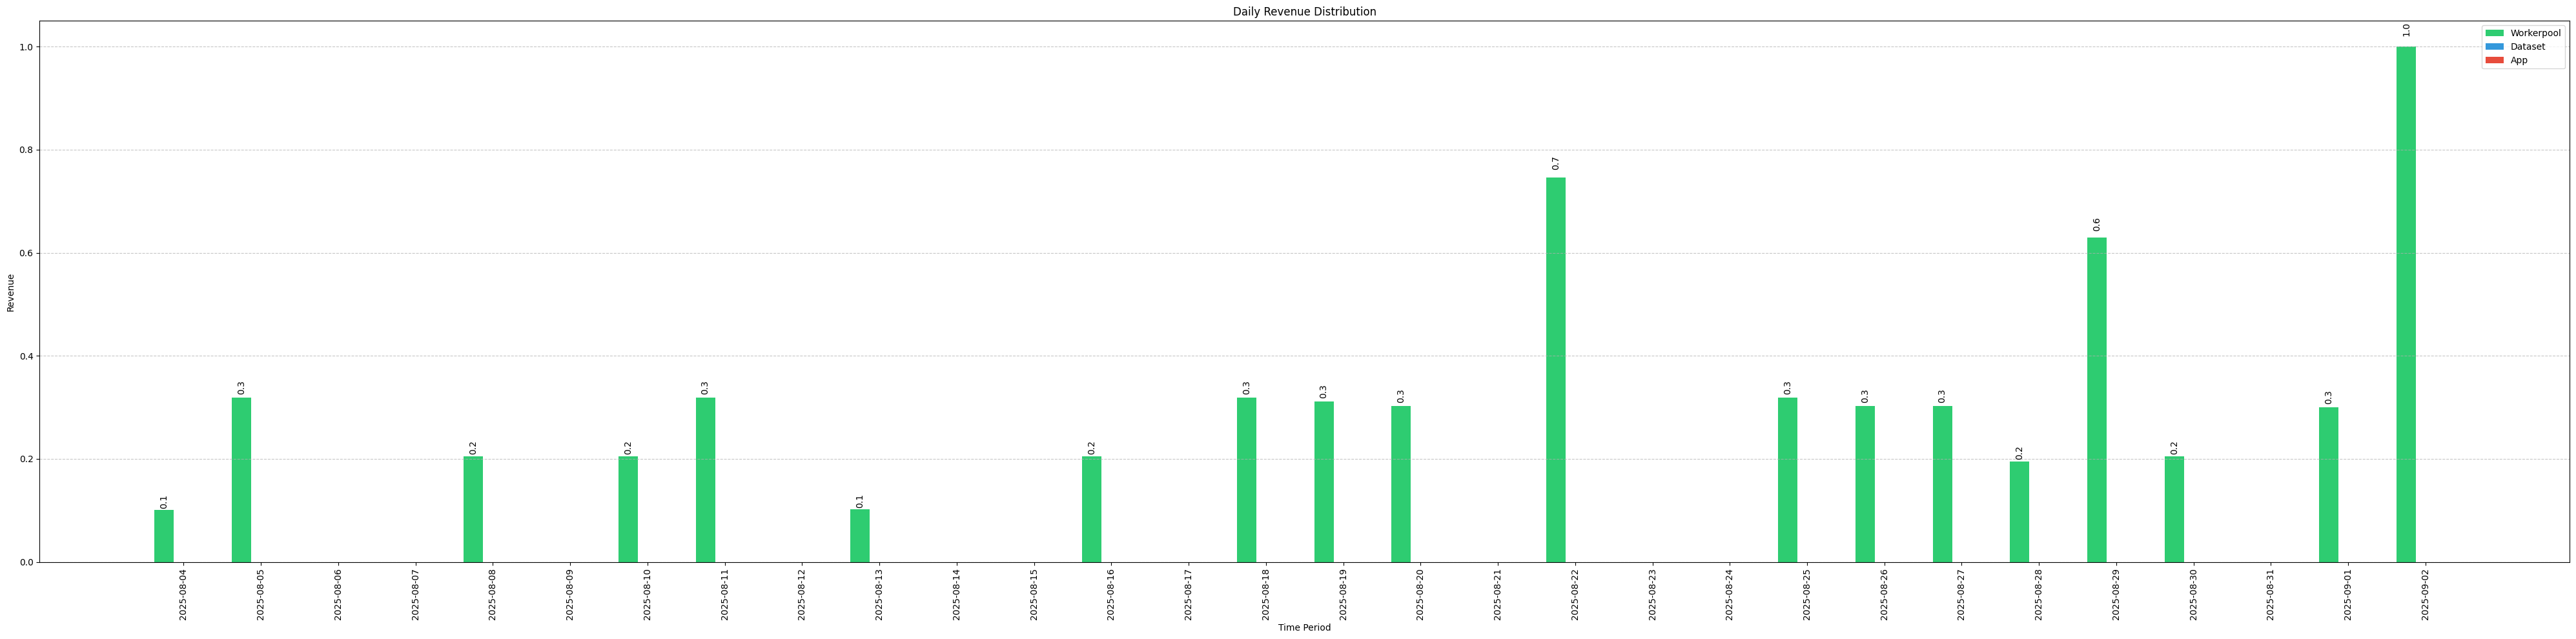

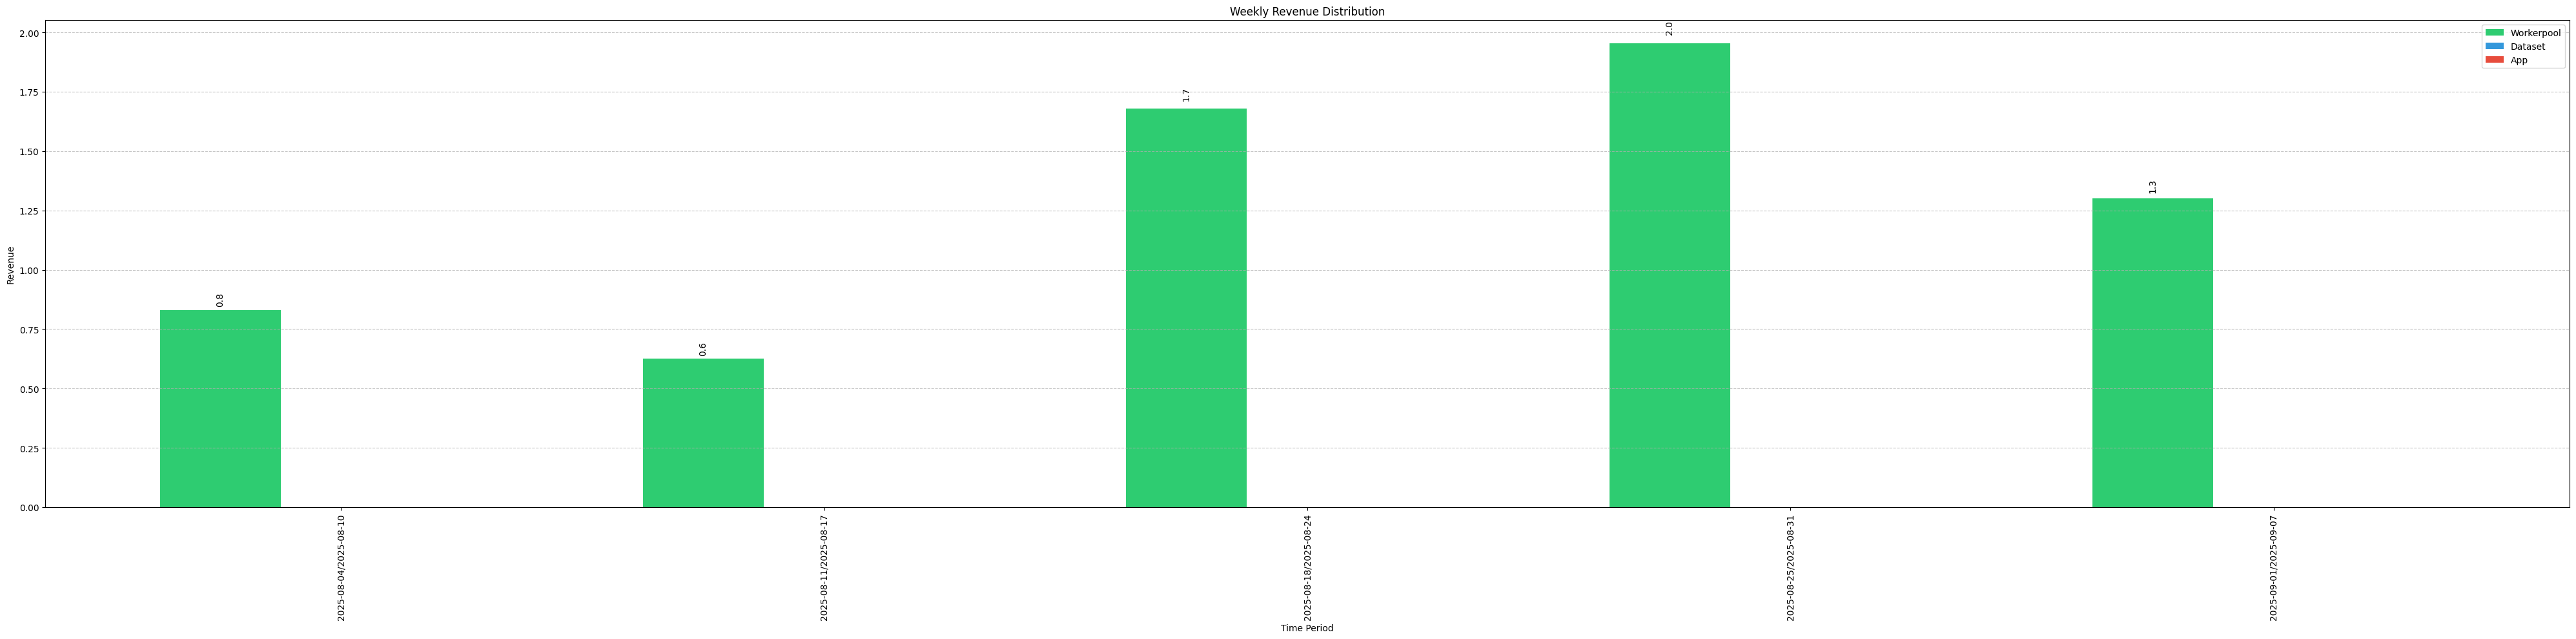

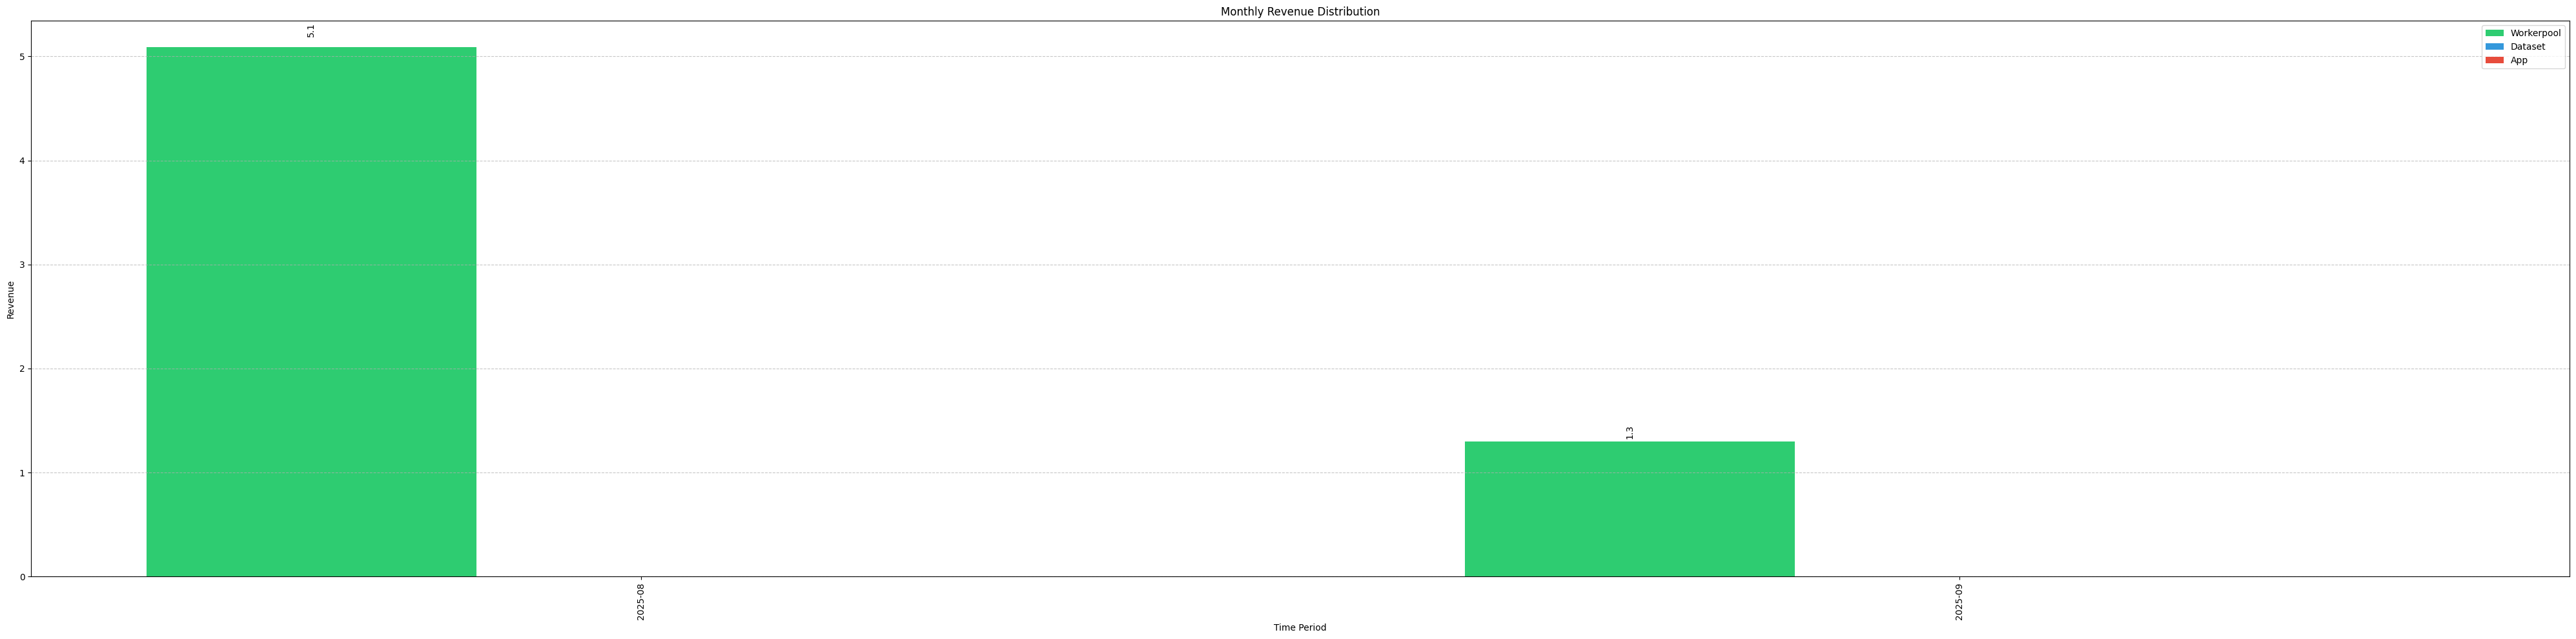

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_price_histogram(df, period='daily'):
    """
    Create a histogram showing price sums by different time periods

    Parameters:
    df (pandas.DataFrame): DataFrame containing DATE, workerpoolPrice, datasetPrice, and appPrice columns
    period (str): Aggregation period - 'daily', 'weekly', or 'monthly'

    Returns:
    pandas.DataFrame: Aggregated price data
    """
    # Ensure DATE is datetime
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Create period groupings
    if period == 'daily':
        df['period'] = df['DATE'].dt.date
        date_format = '%Y-%m-%d'
    elif period == 'weekly':
        df['period'] = df['DATE'].dt.to_period('W').astype(str)
        date_format = 'Week %V, %Y'
    elif period == 'monthly':
        df['period'] = df['DATE'].dt.to_period('M').astype(str)
        date_format = '%B %Y'
    else:
        raise ValueError("Period must be 'daily', 'weekly', or 'monthly'")

    # Group by period and sum the prices
    period_sums = df.groupby('period').agg({
        'workerpoolPrice': 'sum',
        'datasetPrice': 'sum',
        'appPrice': 'sum'
    }).reset_index()

    if period == 'monthly':
      plt.figure(figsize=(40, 10))
    elif period == 'daily':
      plt.figure(figsize=(40, 10))
    elif period == 'weekly':
      plt.figure(figsize=(40, 10))


    # Plot each price type as a different colored bar
    bar_width = 0.25
    indices = range(len(period_sums['period']))

    bars1 = plt.bar(indices, period_sums['workerpoolPrice'], bar_width,
                    label='Workerpool', color='#2ecc71')
    bars2 = plt.bar([i + bar_width for i in indices], period_sums['datasetPrice'],
                    bar_width, label='Dataset', color='#3498db')
    bars3 = plt.bar([i + 2*bar_width for i in indices], period_sums['appPrice'],
                    bar_width, label='App', color='#e74c3c')

    # Add value labels on top of bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            if height != 0:
              plt.text(bar.get_x() + bar.get_width()/2., 1.02*height,
                      f'{height:.1f}',
                      ha='center', va='bottom', rotation=90)

    add_value_labels(bars1)
    add_value_labels(bars2)
    add_value_labels(bars3)

    # Customize the plot
    plt.xlabel('Time Period')
    plt.ylabel('Revenue')
    plt.title(f'{period.capitalize()} Revenue Distribution')
    plt.legend()

    # Format x-axis to show dates
    if period == 'daily':
        plt.xticks([i + bar_width for i in indices],
                   period_sums['period'], rotation=90)
    else:
        plt.xticks([i + bar_width for i in indices],
                   period_sums['period'], rotation=90)

    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()

    return period_sums

# Function to plot all three time periods side by side
def plot_all_periods(df,show_monthly=True, show_weekly=True, show_daily=True):
    """
    Create three subplots showing daily, weekly, and monthly price distributions

    Parameters:
    df (pandas.DataFrame): DataFrame containing DATE, workerpoolPrice, datasetPrice, and appPrice columns

    Returns:
    tuple: Daily, weekly, and monthly aggregated data
    """
    plt.figure(figsize=(35, 12))

    # Daily subplot
    if show_daily is True:
        daily_data = plot_price_histogram(df, 'daily')

    # Weekly subplot
    if show_weekly is True:
        weekly_data = plot_price_histogram(df, 'weekly')

    # Monthly subplot
    if show_monthly is True:
        monthly_data = plot_price_histogram(df, 'monthly')


plot_all_periods(df_latest, show_monthly=True, show_weekly=True, show_daily=True)

## Section 3 : Save dataset in google drive [USE CAREFULLY]

Pre requisite : Google Drive connected
Save data in google Drive, Control filename to avoid overwrite existing dataset

In [13]:

# @title Save data in csv file on google drive [USE CAREFULLY!!!!!!]
from datetime import datetime
from google.colab import drive
drive.mount('/content/drive')

#Define the period
date_begin = '2025-08-01 00:00:00'
date_end = '2025-09-01 00:00:00'

filename='/content/drive/Shareddrives/App_and_Product/dashboard_marketplace/data/TRD/TRD_2025_08.csv'
date_begin = datetime.strptime(date_begin, '%Y-%m-%d %H:%M:%S')
date_end = datetime.strptime(date_end, '%Y-%m-%d %H:%M:%S')

print ("Period to retrieve:", date_begin, date_end)

api_data = get_api_data_iexec_interval(url_query_bellecour, query, 0, date_begin, date_end)
df = pd.DataFrame(api_data, columns=["DATE", "workerpoolPrice", "datasetPrice","appPrice", "appName","appAddress", "workerpool"])
df["DATE"] = [datetime.utcfromtimestamp(int(x)) for x in df["DATE"]]

print("Period observed", df["DATE"].min(), df["DATE"].max())
print("dataset length: " + str(df.shape[0]))

# Save the DataFrame to CSV with the new filename
#df.to_csv(filename, index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Period to retrieve: 2025-08-01 00:00:00 2025-09-01 00:00:00


/tmp/ipython-input-4149953913.py:25: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  filtered_data = [row for row in data_list if date_begin <= datetime.utcfromtimestamp(int(row[0])) <= date_end]


i= 500 are_data: False_are_data: False grouped size 0 array_data size: 500
i= 1000 are_data: True_are_data: True grouped size 61 array_data size: 500
i= 1500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 2000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 2500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 3000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 3500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 4000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 4500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 5000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 5500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 6000 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 6500 are_data: True_are_data: True grouped size 500 array_data size: 500
i= 7000 are_da

/tmp/ipython-input-4154970597.py:18: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  df["DATE"] = [datetime.utcfromtimestamp(int(x)) for x in df["DATE"]]


## Section 4 : Load dataset from google drive


In [14]:
# @title Load dataset from csv file store on google drive

import os
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

# Directory containing CSV files
directory='/content/drive/Shareddrives/App_and_Product/dashboard_marketplace/data/TRD/'

# List to store DataFrames from each CSV file
dfs = []

# Iterate over each file in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        # Read CSV file into a DataFrame
        filepath = os.path.join(directory, filename)
        dftmp = pd.read_csv(filepath)
        dftmp['DATE'] = pd.to_datetime(dftmp['DATE'])
        _begin = dftmp['DATE'].min().strftime("%Y-%m-%d")
        _end = dftmp['DATE'].max().strftime("%Y-%m-%d")
        print(str(filename) + " " + str(_begin) + " " + str(_end))
        # Append DataFrame to the list
        dfs.append(dftmp)

# Concatenate all DataFrames into a single DataFrame
concatenated_df = pd.concat(dfs, ignore_index=True)


_begin = concatenated_df['DATE'].min().strftime("%Y-%m-%d")
_end = concatenated_df['DATE'].max().strftime("%Y-%m-%d")
print("global dataframe: " + str(concatenated_df.shape) +" " + str(_begin) + " " + str(_end))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
TRD_2025_01.csv 2025-01-01 2025-01-31
TRD_2024_12.csv 2024-12-01 2024-12-31
TRD_2024_11.csv 2024-11-01 2024-11-30
TRD_2024_10.csv 2024-10-01 2024-10-31
TRD_2024_09.csv 2024-09-01 2024-09-30
TRD_2024_08.csv 2024-08-01 2024-08-31
TRD_2024_07.csv 2024-07-01 2024-08-01
TRD_2024_06.csv 2024-06-01 2024-06-30
TRD_2024_05.csv 2024-05-01 2024-05-31
TRD_2024_04.csv 2024-04-01 2024-04-30
TRD_2024_03.csv 2024-03-01 2024-03-31
TRD_2024_02.csv 2024-02-01 2024-02-29
TRD_2024_01.csv 2024-01-01 2024-01-31
TRD_2023_Q4.csv 2023-10-01 2023-12-31
TRD_2023_Q3.csv 2023-07-01 2023-09-30
TRD_2023_Q2.csv 2023-04-01 2023-06-30
TRD_2023_Q1.csv 2023-01-01 2023-03-31
TRD_2022-2017.csv 2020-07-15 2022-12-31
TRD_2025_02.csv 2025-02-01 2025-02-28
TRD_2025_03.csv 2025-03-01 2025-03-31
TRD_2025_04.csv 2025-04-01 2025-04-30
TRD_2025_05.csv 2025-05-01 2025-05-31
TRD_2025_06.csv 2025-06-01 2025-0

In [15]:
# @title show header

concatenated_df

,DATE,workerpoolPrice,datasetPrice,appPrice,appName,appAddress,workerpool
0,2025-01-31 23:59:50,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.7.6-v15-debug,docker.io/iexechub/python-hello-world:8.0.0-sc...,0xdb214a4a444d176e22030be1ed89da1b029320f2
1,2025-01-31 23:56:50,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.7.6-v15-pro...,docker.io/iexechub/python-hello-world:8.0.0-sc...,0x0e7bc972c99187c191a17f3cae4a2711a4188c3f
2,2025-01-31 23:55:25,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.7.6-v15-pro...,docker.io/iexechub/python-hello-world:8.0.0-sc...,0x0975bfce90f4748dab6d6729c96b33a2cd5491f5
3,2025-01-31 23:54:10,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.7.6-v15-debug,docker.io/iexechub/python-hello-world:8.0.0-sc...,0xf900995aa41ab29bc16ba0785d7c67ad9d301296
4,2025-01-31 23:52:50,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.7.6-v15-debug,docker.io/iexechub/python-hello-world:8.0.0-sc...,0xdb214a4a444d176e22030be1ed89da1b029320f2
...,...,...,...,...,...,...,...
1502495,2025-08-01 00:05:00,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.7.6-v15-pro...,docker.io/iexechub/python-hello-world:8.0.0-sc...,0x0e7bc972c99187c191a17f3cae4a2711a4188c3f
1502496,2025-08-01 00:04:35,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.9.1-v15-pro...,docker.io/iexechub/python-hello-world:8.0.0-sc...,0x0e7bc972c99187c191a17f3cae4a2711a4188c3f
1502497,2025-08-01 00:02:35,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.7.6-v15-pro...,docker.io/iexechub/python-hello-world:8.0.0-sc...,0x0975bfce90f4748dab6d6729c96b33a2cd5491f5
1502498,2025-08-01 00:02:15,0.0,0.0,0.0,python-hello-world:8.0.0-sconify-5.9.1-v15-pro...,docker.io/iexechub/python-hello-world:8.0.0-sc...,0x0975bfce90f4748dab6d6729c96b33a2cd5491f5


In [16]:
# @title Display dataset struture and date info

print("Period observed", concatenated_df["DATE"].min(), concatenated_df["DATE"].max())

print("dataset length: " + str(concatenated_df.shape[0]))

concatenated_df.dtypes


Period observed 2020-07-15 14:58:20 2025-08-31 23:55:35
dataset length: 1502500


,0
DATE,datetime64[ns]
workerpoolPrice,float64
datasetPrice,float64
appPrice,float64
appName,object
appAddress,object
workerpool,object


## Section 5 : Visualize full historical data

<Figure size 3500x1200 with 0 Axes>

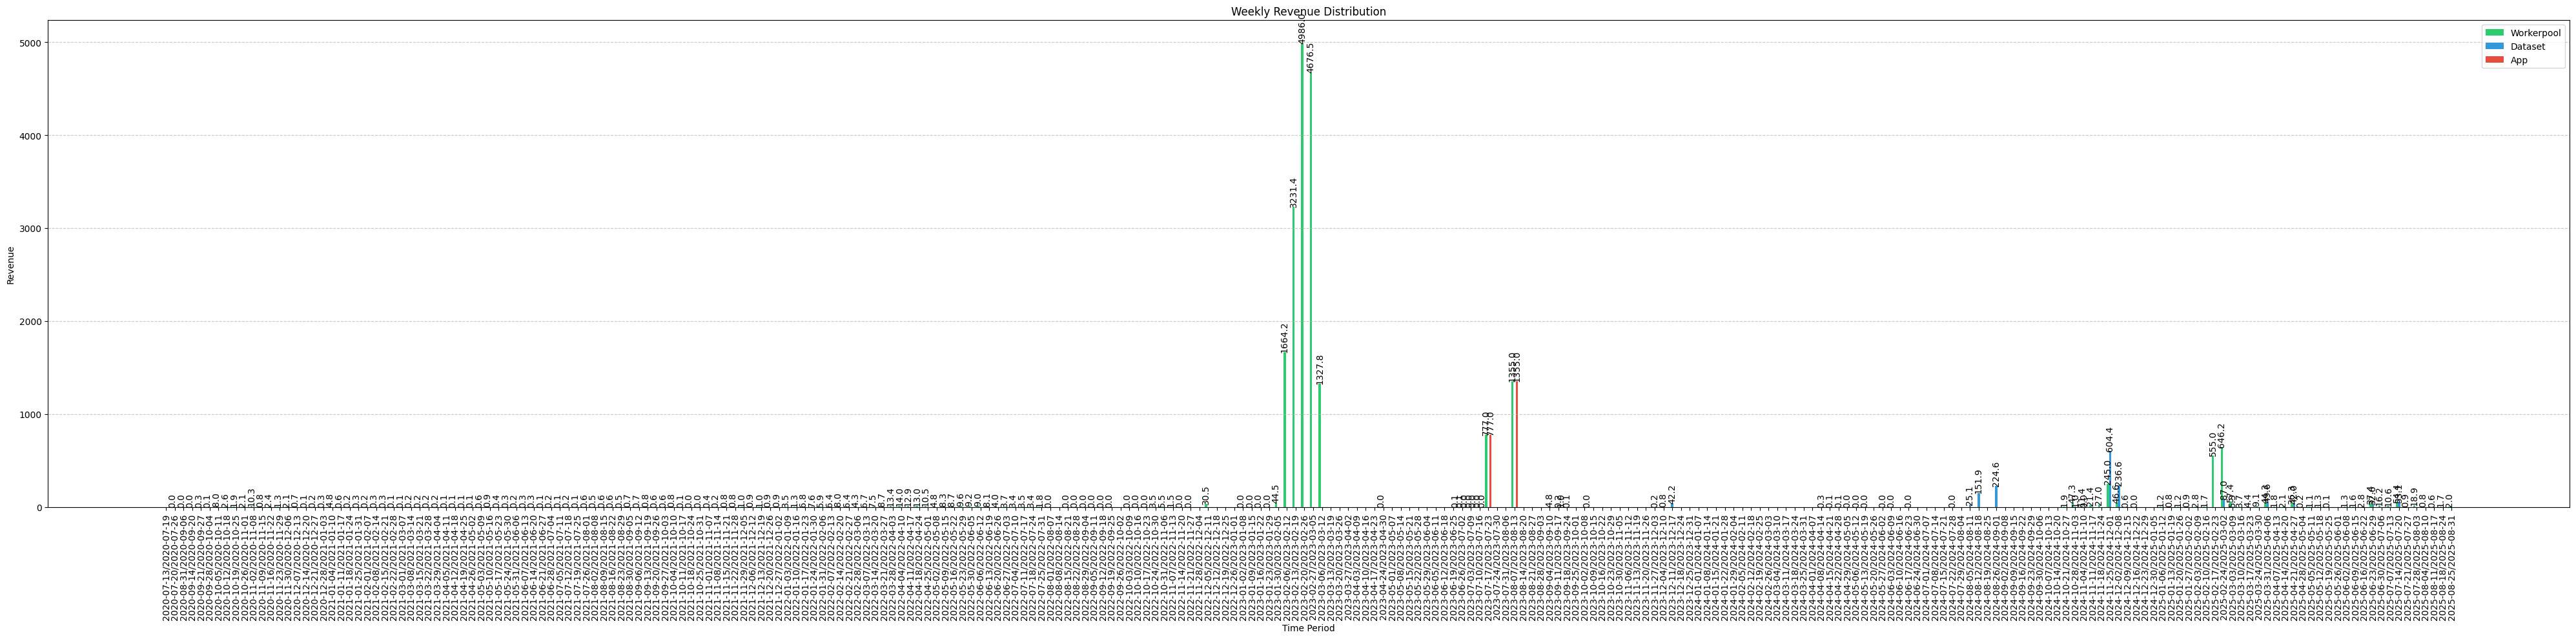

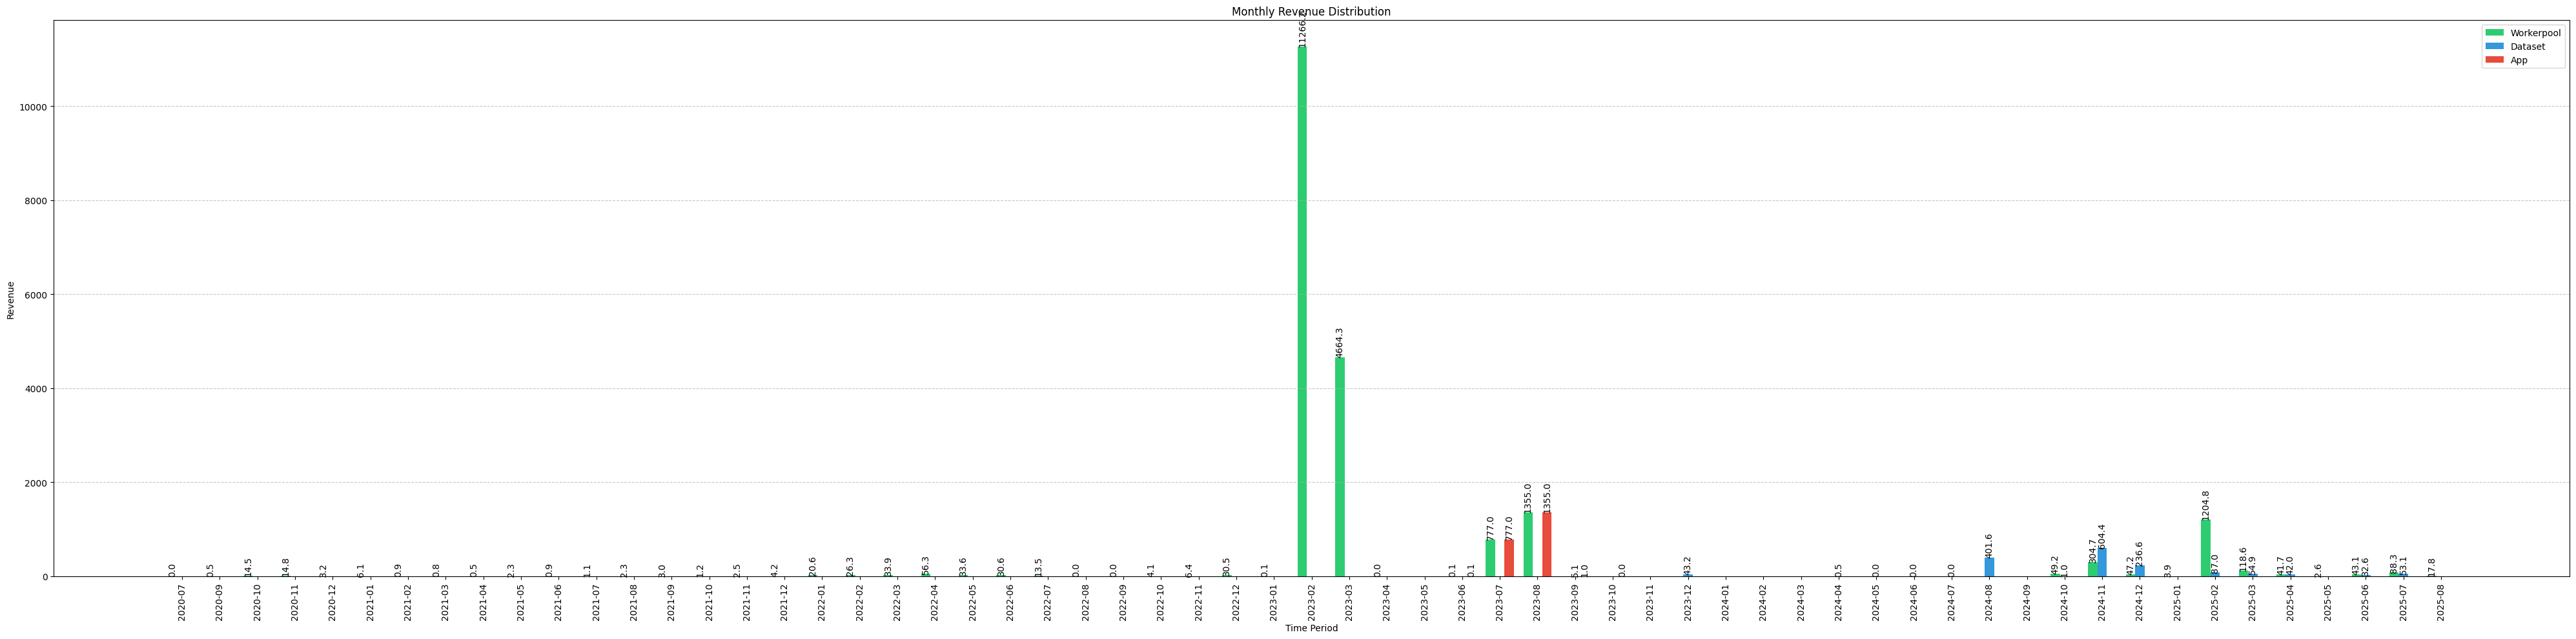

/tmp/ipython-input-2184633353.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])
/tmp/ipython-input-2184633353.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = df['DATE'].dt.to_period('W').astype(str)


<Figure size 3500x1200 with 0 Axes>

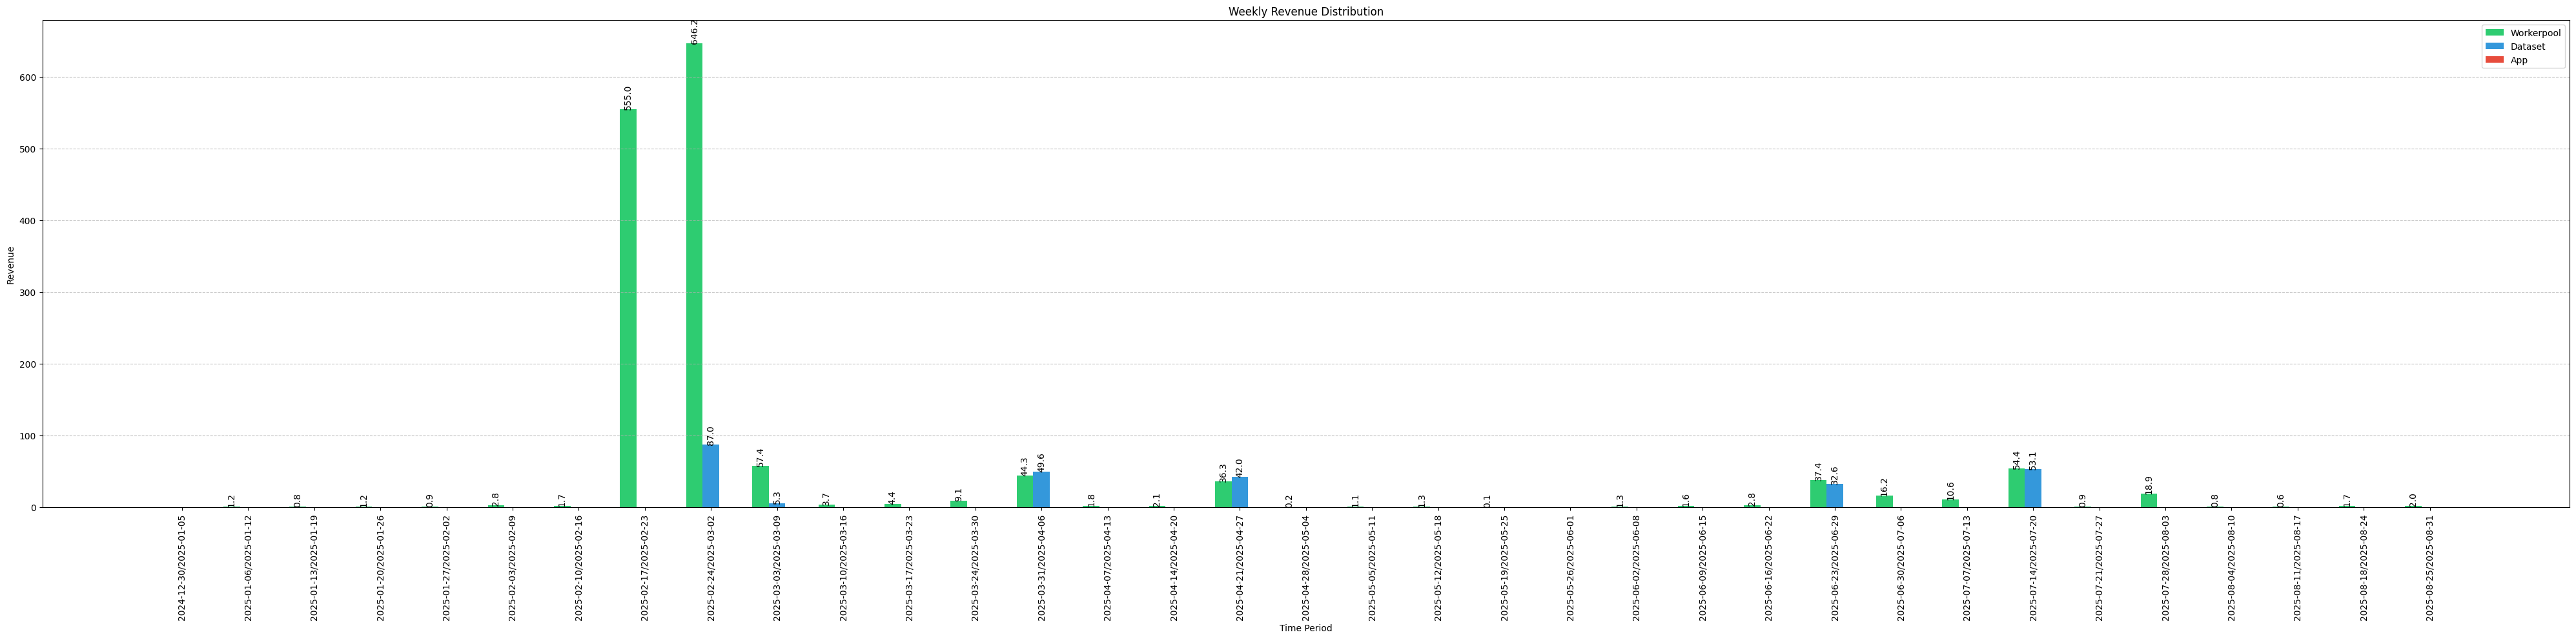

/tmp/ipython-input-2184633353.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DATE'] = pd.to_datetime(df['DATE'])
/tmp/ipython-input-2184633353.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['period'] = df['DATE'].dt.to_period('M').astype(str)


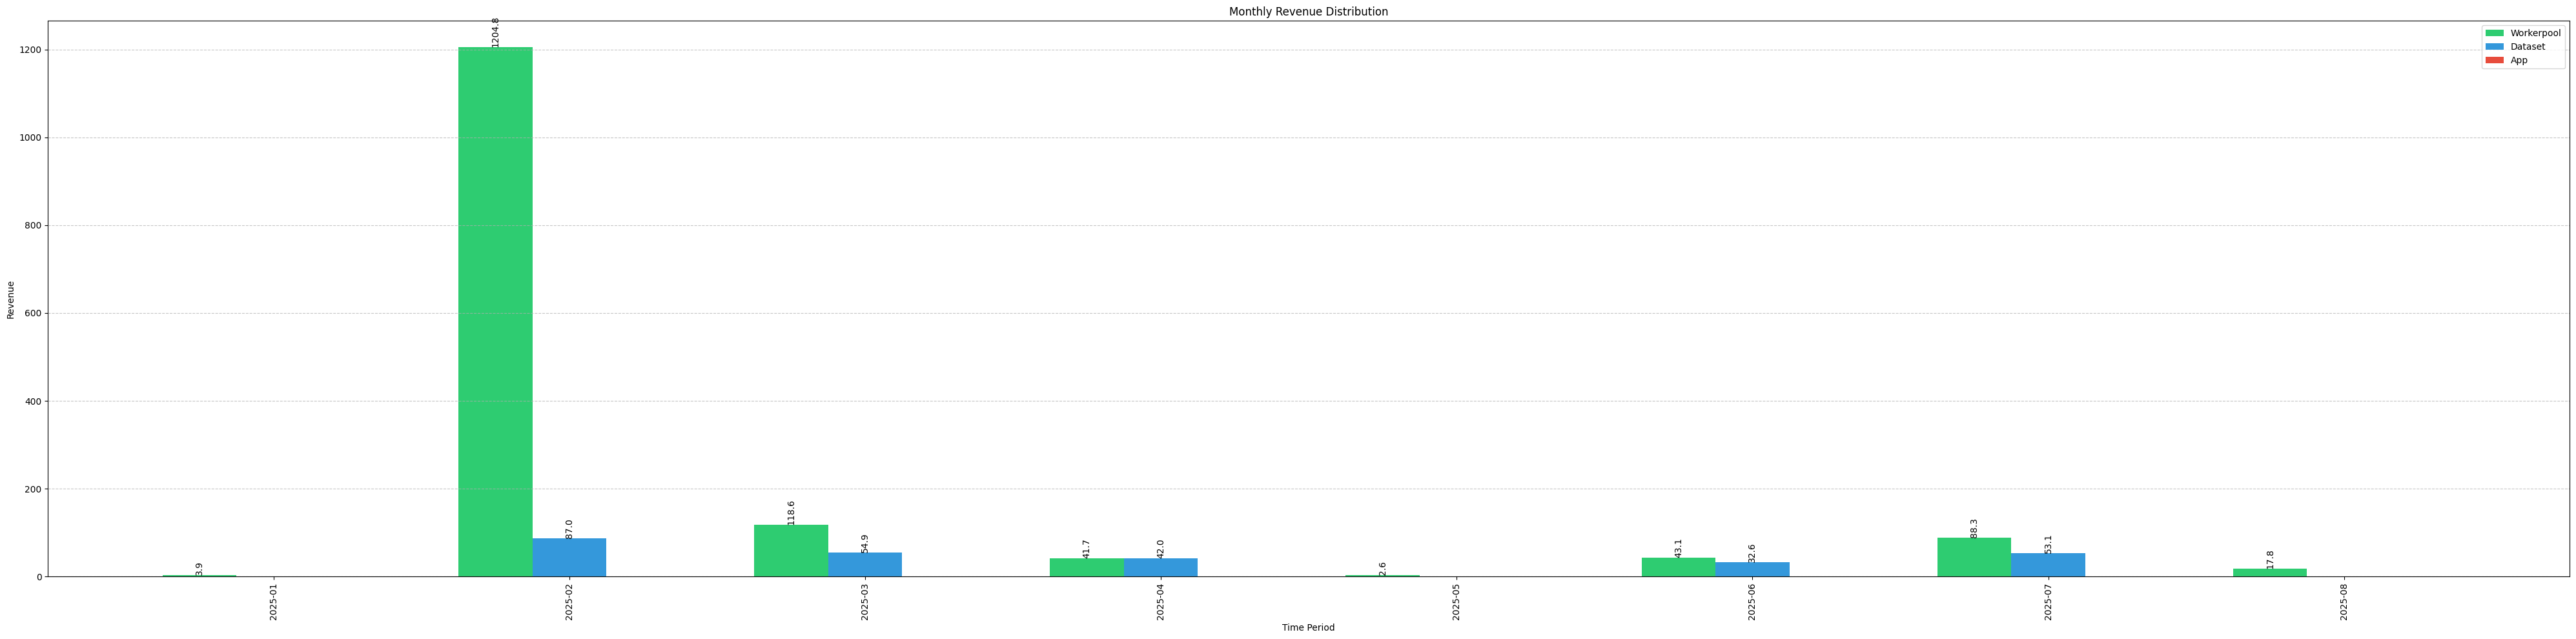

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime


import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

def plot_price_histogram(df, period='daily'):
    """
    Create a histogram showing price sums by different time periods

    Parameters:
    df (pandas.DataFrame): DataFrame containing DATE, workerpoolPrice, datasetPrice, and appPrice columns
    period (str): Aggregation period - 'daily', 'weekly', or 'monthly'

    Returns:
    pandas.DataFrame: Aggregated price data
    """
    # Ensure DATE is datetime
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Create period groupings
    if period == 'daily':
        df['period'] = df['DATE'].dt.date
        date_format = '%Y-%m-%d'
    elif period == 'weekly':
        df['period'] = df['DATE'].dt.to_period('W').astype(str)
        date_format = 'Week %V, %Y'
    elif period == 'monthly':
        df['period'] = df['DATE'].dt.to_period('M').astype(str)
        date_format = '%B %Y'
    else:
        raise ValueError("Period must be 'daily', 'weekly', or 'monthly'")

    # Group by period and sum the prices
    period_sums = df.groupby('period').agg({
        'workerpoolPrice': 'sum',
        'datasetPrice': 'sum',
        'appPrice': 'sum'
    }).reset_index()

    if period == 'monthly':
      plt.figure(figsize=(40, 10))
    elif period == 'daily':
      plt.figure(figsize=(40, 10))
    elif period == 'weekly':
      plt.figure(figsize=(40, 10))


    # Plot each price type as a different colored bar
    bar_width = 0.25
    indices = range(len(period_sums['period']))

    bars1 = plt.bar(indices, period_sums['workerpoolPrice'], bar_width,
                    label='Workerpool', color='#2ecc71')
    bars2 = plt.bar([i + bar_width for i in indices], period_sums['datasetPrice'],
                    bar_width, label='Dataset', color='#3498db')
    bars3 = plt.bar([i + 2*bar_width for i in indices], period_sums['appPrice'],
                    bar_width, label='App', color='#e74c3c')

    # Add value labels on top of bars
    def add_value_labels(bars):
        for bar in bars:
            height = bar.get_height()
            if height != 0:
              plt.text(bar.get_x() + bar.get_width()/2., height,
                      f'{height:.1f}',
                      ha='center', va='bottom', rotation=90)

    add_value_labels(bars1)
    add_value_labels(bars2)
    add_value_labels(bars3)

    # Customize the plot
    plt.xlabel('Time Period')
    plt.ylabel('Revenue')
    plt.title(f'{period.capitalize()} Revenue Distribution')
    plt.legend()

    # Format x-axis to show dates
    if period == 'daily':
        plt.xticks([i + bar_width for i in indices],
                   period_sums['period'], rotation=90)
    else:
        plt.xticks([i + bar_width for i in indices],
                   period_sums['period'], rotation=90)

    # Add grid for better readability
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)

    # Adjust layout to prevent label cutoff
    plt.tight_layout()

    # Show the plot
    plt.show()

    return period_sums

# Function to plot all three time periods side by side
def plot_all_periods(df,show_monthly=True, show_weekly=True, show_daily=True):
    """
    Create three subplots showing daily, weekly, and monthly price distributions

    Parameters:
    df (pandas.DataFrame): DataFrame containing DATE, workerpoolPrice, datasetPrice, and appPrice columns

    Returns:
    tuple: Daily, weekly, and monthly aggregated data
    """
    plt.figure(figsize=(35, 12))

    # Daily subplot
    if show_daily is True:
        daily_data = plot_price_histogram(df, 'daily')

    # Weekly subplot
    if show_weekly is True:
        weekly_data = plot_price_histogram(df, 'weekly')

    # Monthly subplot
    if show_monthly is True:
        monthly_data = plot_price_histogram(df, 'monthly')


plot_all_periods(concatenated_df, show_monthly=True, show_weekly=True, show_daily=False)


# Filter on year 2025
df_2025 = concatenated_df[concatenated_df['DATE'].dt.year == 2025]

# Now call your plotting function
plot_all_periods(df_2025, show_monthly=True, show_weekly=True, show_daily=False)

# Section 6 : Monthly TRD

In [18]:
import pandas as pd

def summarize_monthly_prices(df):
    """
    Summarize total prices per month.

    Parameters:
    df (pandas.DataFrame): DataFrame containing DATE, workerpoolPrice, datasetPrice, and appPrice columns

    Returns:
    pandas.DataFrame: Monthly aggregated total price
    """
    # Ensure DATE is datetime
    df['DATE'] = pd.to_datetime(df['DATE'])

    # Convert to monthly period
    df['month'] = df['DATE'].dt.to_period('M')

    # Sum all price components into one total price
    df['totalTRD'] = df['workerpoolPrice'] + df['datasetPrice'] + df['appPrice']

    # Group by month and sum price columns
    monthly_summary = df.groupby('month')[['totalTRD', 'workerpoolPrice', 'datasetPrice', 'appPrice']].sum().reset_index()

    # Convert month back to string for display
    monthly_summary['month'] = monthly_summary['month'].astype(str)

    # Optionally format prices (if returning for display)
    monthly_summary['totalTRD'] = monthly_summary['totalTRD'].map('{:,.2f}'.format)
    monthly_summary['workerpoolTRD'] = monthly_summary['workerpoolPrice'].map('{:,.2f}'.format)
    monthly_summary['datasetTRD'] = monthly_summary['datasetPrice'].map('{:,.2f}'.format)
    monthly_summary['appTRD'] = monthly_summary['appPrice'].map('{:,.2f}'.format)

    return monthly_summary


summary = summarize_monthly_prices(concatenated_df)

In [19]:
import requests
import pandas as pd

graphql_endpoint = 'https://thegraph.bellecour.iex.ec/subgraphs/name/bellecour/iexec-voucher'

query_template = """
{{
  vouchers(first: 10, skip: {skip}) {{
    id
    owner {{
      id
    }}
    expiration
    value
    balance
    voucherType {{
      id
      description
      duration
    }}
  }}
}}
"""

def get_api_data_voucher(url_query):
    total_data = []
    are_data = True
    detected = False
    skip = 0
    while are_data or not detected:
        query_iter = query_template.format(skip=skip)
        payload = {'query': query_iter}
        headers = {'Content-Type': 'application/json'}

        response = requests.post(url_query, json=payload, headers=headers)
        response.raise_for_status()
        data = response.json()

        array_data = data.get('data', {}).get('vouchers', [])
        grouped = [
            {
                'voucher_id': v['id'],
                'owner_id': v['owner']['id'],
                'expiration': int(v['expiration']),
                'value': float(v['value']),
                'balance': float(v['balance']),
                'voucher_type_id': v['voucherType']['id'],
                'voucher_type_description': v['voucherType']['description'],
                'voucher_type_duration': int(v['voucherType']['duration']),
            }
            for v in array_data
        ]

        total_data.extend(grouped)
        skip += 10
        are_data = len(grouped) > 0
        if are_data:
            detected = True
        print(f"Fetched {len(grouped)} records, total so far: {len(total_data)}")

    return total_data


query_template2 = """
{{
  deals(first: 500, skip: {skip}, orderBy: timestamp, orderDirection: desc) {{
    id
    sponsoredAmount
    timestamp
    requester {{
      id
    }}
  }}
}}
"""

def get_api_data_voucherdeal(url_query):
    total_data = []
    are_data = True
    detected = False
    skip = 0
    while are_data or not detected:
        query_iter = query_template2.format(skip=skip)
        payload = {'query': query_iter}
        headers = {'Content-Type': 'application/json'}

        response = requests.post(url_query, json=payload, headers=headers)
        response.raise_for_status()
        data = response.json()
        array_data = data.get('data', {}).get('deals', [])
        grouped = [
            {
                'deal_id': v['id'],
                'sponsoredAmount': float(v['sponsoredAmount']),
                'timstamp': v['timestamp'],
                'requester_id': v['requester']['id'],
            }
            for v in array_data
        ]

        total_data.extend(grouped)
        skip += 500
        are_data = len(grouped) > 0
        if are_data:
            detected = True
        print(f"Fetched {len(grouped)} records, total so far: {len(total_data)}")

    return total_data

# Use it
voucher_data = get_api_data_voucher(graphql_endpoint)
df_voucher = pd.DataFrame(voucher_data)

voucher_deal = get_api_data_voucherdeal(graphql_endpoint)
df_voucherdeal = pd.DataFrame(voucher_deal)
print(df_voucher.head())
print("Dataset length:", df_voucher.shape[0])
print(df_voucherdeal.head())
print("Dataset length:", df_voucherdeal.shape[0])



def summarize_monthly_prices(df_voucherdeal):
    """
    Summarize total sponsored amounts and count of sponsored deals per month.

    Parameters:
    df_voucherdeal (pandas.DataFrame): DataFrame containing 'timstamp' and 'sponsoredAmount' columns.

    Returns:
    pandas.DataFrame: Monthly aggregated total sponsored amount and deal count.
    """
    import pandas as pd

    # Ensure DATE is datetime
    df_voucherdeal['DATE'] = pd.to_datetime(df_voucherdeal['timstamp'], unit='s')

    # Convert to monthly period
    df_voucherdeal['month'] = df_voucherdeal['DATE'].dt.to_period('M')

    # Group by month: sum of sponsoredAmount and count of deals
    monthly_summary = df_voucherdeal.groupby('month').agg(
        total_sponsored_amount=('sponsoredAmount', 'sum'),
        sponsored_deal_count=('sponsoredAmount', 'count')
    ).reset_index()

    # Convert month back to string for display
    monthly_summary['month'] = monthly_summary['month'].astype(str)

    # Format total_sponsored_amount to float with 2 decimal places
    monthly_summary['total_sponsored_amount'] = monthly_summary['total_sponsored_amount'].map('{:,.2f}'.format)

    return monthly_summary



summary_voucher = summarize_monthly_prices(df_voucherdeal)
df_final = pd.merge(summary, summary_voucher, on='month', how='inner')

print(df_final.drop(['workerpoolPrice','datasetPrice','appPrice'], axis=1))

Fetched 10 records, total so far: 10
Fetched 10 records, total so far: 20
Fetched 10 records, total so far: 30
Fetched 10 records, total so far: 40
Fetched 10 records, total so far: 50
Fetched 10 records, total so far: 60
Fetched 10 records, total so far: 70
Fetched 10 records, total so far: 80
Fetched 10 records, total so far: 90
Fetched 5 records, total so far: 95
Fetched 0 records, total so far: 95
Fetched 500 records, total so far: 500
Fetched 500 records, total so far: 1000
Fetched 500 records, total so far: 1500
Fetched 500 records, total so far: 2000
Fetched 500 records, total so far: 2500
Fetched 500 records, total so far: 3000
Fetched 500 records, total so far: 3500
Fetched 500 records, total so far: 4000
Fetched 500 records, total so far: 4500
Fetched 500 records, total so far: 5000
Fetched 500 records, total so far: 5500
Fetched 500 records, total so far: 6000
Fetched 500 records, total so far: 6500
Fetched 500 records, total so far: 7000
Fetched 500 records, total so far: 7

/tmp/ipython-input-1655502245.py:136: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  df_voucherdeal['DATE'] = pd.to_datetime(df_voucherdeal['timstamp'], unit='s')


      month  totalTRD workerpoolTRD datasetTRD appTRD total_sponsored_amount  \
0   2024-10     50.23         49.23       1.00   0.00                  49.23   
1   2024-11    909.11        304.71     604.40   0.00                 304.71   
2   2024-12    283.78         47.18     236.60   0.00                  47.18   
3   2025-01      3.91          3.91       0.00   0.00                   3.91   
4   2025-02  1,291.82      1,204.82      87.00   0.00               1,204.82   
5   2025-03    173.46        118.60      54.86   0.00                 118.60   
6   2025-04     83.68         41.68      42.00   0.00                  41.68   
7   2025-05      2.62          2.62       0.00   0.00                   2.62   
8   2025-06     75.68         43.08      32.60   0.00                  43.08   
9   2025-07    141.39         88.29      53.10   0.00                  65.91   
10  2025-08     17.81         17.81       0.00   0.00                  17.08   

    sponsored_deal_count  
0           

In [20]:
df_final.drop(['workerpoolPrice','datasetPrice','appPrice'], axis=1)


,month,totalTRD,workerpoolTRD,datasetTRD,appTRD,total_sponsored_amount,sponsored_deal_count
0,2024-10,50.23,49.23,1.00,0.00,49.23,770
1,2024-11,909.11,304.71,604.40,0.00,304.71,5763
2,2024-12,283.78,47.18,236.60,0.00,47.18,1034
3,2025-01,3.91,3.91,0.00,0.00,3.91,50
4,2025-02,"1,291.82","1,204.82",87.00,0.00,"1,204.82",15141
5,2025-03,173.46,118.60,54.86,0.00,118.60,1339
6,2025-04,83.68,41.68,42.00,0.00,41.68,495
7,2025-05,2.62,2.62,0.00,0.00,2.62,33
8,2025-06,75.68,43.08,32.60,0.00,43.08,405
9,2025-07,141.39,88.29,53.10,0.00,65.91,663
